In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import lcls_beamline_toolbox.xraywavetrace.beam1d as beam
import lcls_beamline_toolbox.xraywavetrace.optics1d as optics
import lcls_beamline_toolbox.xraywavetrace.beamline1d as beamline
import scipy.optimize as optimize
import lcls_beamline_toolbox.utility.util as util
import copy
import scipy.spatial.transform as transform
from lcls_beamline_toolbox.models.split_and_delay_motion import SND

Can't find epics package. PPM_Imager class will not be supported


## Hard X-ray Split and Delay

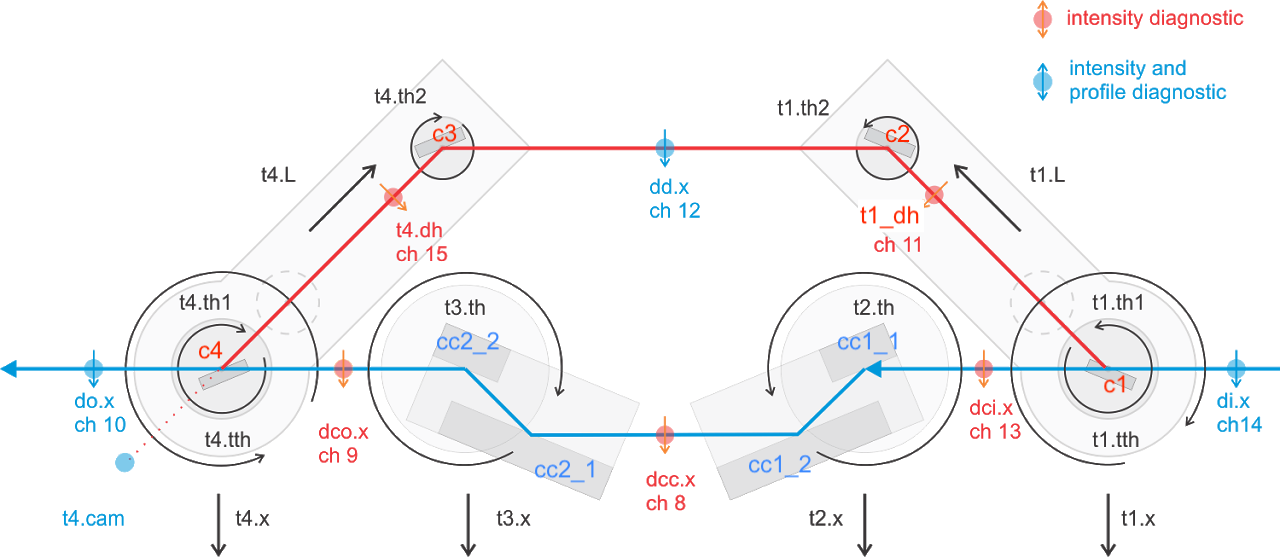


See above figure for diagnostics, optics, and degrees of freedom definitions. The image is taken from the XCS confluence page: [Hard X-ray Split-Delay System](https://confluence.slac.stanford.edu/x/ihZSDg), and further details about the system design can be found in [the paper by Zhu et al.](https://www.spiedigitallibrary.org/conference-proceedings-of-spie/10237/1/Development-of-a-hard-x-ray-split-delay-system-at/10.1117/12.2265171.short)

# List of Inputs for "delay branch" (red line)
- t1_tth
- t1_th1
- t1_th2
- t4_th2
- t4_th1
- t4_tth
- t1_L
- t4_L
- t1_chi1
- t1_chi2
- t4_chi1
- t4_chi2
- t1_x
- t2_x
- t3_x
- t4_x
- t2_th
- t3_th
- t1_y1
- t1_y2
- t4_y1
- t4_y2

### Let's start with a range of [-100e-6, 100e-6] for the first six degrees of freedom listed above for now.

# List of outputs for "delay branch"
- t1_dh_sum
- dd_sum
- t4_dh_sum
- do_sum
- dd_cx
- do_cx
- dd_cy
- do_cy
- IP_sum
- IP_cx
- IP_cy

### The "sum" outputs should be maximized, while for the "cx" outputs the absolute value (deviation from zero) should be minimized. Some of the outputs may be redundant.

# Usage
Inputs can be adjusted using "motors" defined in split_and_delay_motion.py. For relative adjustment, the function is motor.mvr(rel_adjustment), and to move to an absolute position, the function is motor.mv(abs_motion).

Outputs can be calculated by first propagating the beam through the system (snd.propagate_delay(), snd.propagate_cc()), followed by querying the output as get_{output name}.


In [20]:
inputs = np.zeros(22)

def get_outputs(energy, delay, inputs):
    snd = SND(energy, delay=delay)
    for i, motor in enumerate(snd.motor_list):
        motor.mv(motor.wm()+inputs[i])
    snd.propagate_delay()
    snd.propagate_cc()
    outputs = {
        't1_dh_sum': snd.get_t1_dh_sum(),
        'dd_sum': snd.get_dd_sum(),
        't4_dh_sum': snd.get_t4_dh_sum(),
        'do_sum': snd.get_do_sum(),
        'dd_cx': snd.get_dd_cx(),
        'dd_cy': snd.get_dd_cy(),
        'do_cx': snd.get_do_cx(),
        'do_cy': snd.get_do_cy(),
        'IP_sum': snd.get_IP_sum(),
        'IP_cx': snd.get_IP_cx(),
        'IP_cy': snd.get_IP_cy()
    }
    return outputs
    
        
    

In [21]:
outputs = get_outputs(9500,280e-3,inputs)

In [22]:
for key in outputs.keys():
    print('{}: {}'.format(key,outputs[key]))

t1_dh_sum: 14194.667576620814
dd_sum: 13449.396191286065
t4_dh_sum: 13035.618872064293
do_sum: 12420.673183481631
dd_cx: 6.566826310116818e-07
dd_cy: -0.0001614344244510974
do_cx: 5.817380839839287e-08
do_cy: -0.00014392158201208485
IP_sum: 8575.193780773621
IP_cx: 2.0952839734665024e-08
IP_cy: 1.6301938701483063e-08
